## Import libraries

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import scipy
from scipy.spatial.distance import pdist, squareform
from pacBayesianDendogramCut import DendrogramCut
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
temp = scipy.io.loadmat('../../multilink/data/ticktoe.mat')
X = temp["X"].tolist()                                 # X = temp.X;
G = temp["G"]    

In [3]:
X = zip(X[0],X[1])
X = list(X)
X = list(map( lambda x: [x[0], x[1]]  ,X))
X = np.asarray(X)

In [4]:
X

array([[ 8.53040692e-04,  6.72882615e-03],
       [ 4.18348216e-03,  2.16395344e-02],
       [ 4.30914092e-02,  3.93053676e-02],
       [ 4.51551837e-02,  5.34461304e-02],
       [ 7.61613773e-02,  5.68689712e-02],
       [ 7.83964979e-02,  9.55074343e-02],
       [ 8.66001816e-02,  9.71160342e-02],
       [ 1.13795488e-01,  1.05388069e-01],
       [ 1.53073428e-01,  1.41465708e-01],
       [ 1.48527604e-01,  1.64678675e-01],
       [ 1.70909873e-01,  1.82194668e-01],
       [ 1.95152372e-01,  1.96845561e-01],
       [ 1.96947580e-01,  2.02790819e-01],
       [ 2.24328971e-01,  2.30851515e-01],
       [ 2.13745088e-01,  2.45474475e-01],
       [ 2.47018261e-01,  2.47791619e-01],
       [ 2.63320613e-01,  2.74797805e-01],
       [ 2.86390320e-01,  2.88959734e-01],
       [ 3.26342169e-01,  3.10180145e-01],
       [ 3.22527597e-01,  3.22537966e-01],
       [ 3.37656513e-01,  3.44737125e-01],
       [ 3.47239995e-01,  3.57140884e-01],
       [ 3.78732338e-01,  3.76877473e-01],
       [ 3.

## Generate dataset for clustering

In [4]:
centers = np.asarray([[-6.8, -7.3], [5, 2.5], [5, -2.5]])
samples = np.asarray([4, 1, 1]) * 50

'''X2, Z, C = sklearn.datasets.make_blobs(
    samples,
    cluster_std=[2, 1, 1],
    centers=centers,
    return_centers=True)'''
dist = pdist(X)
dist = squareform(dist)

## Plot the generated dataset

C:\Users\allem\AppData\Local\Temp/ipykernel_15020/1025274349.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


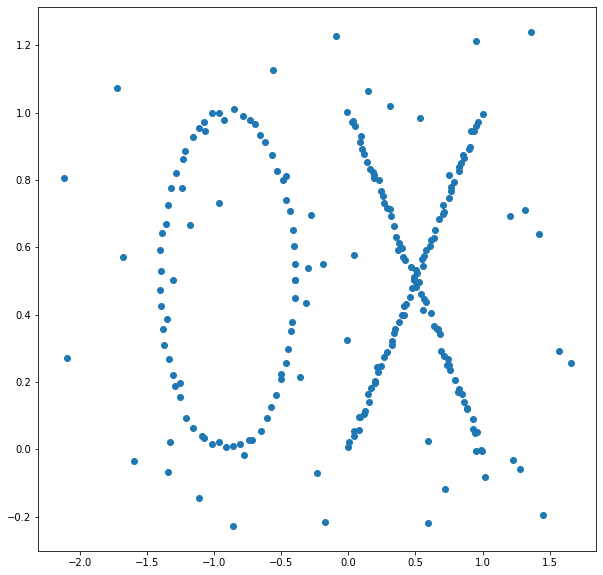

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1])
#ax.scatter(C[:, 0], C[:, 1])
fig.show()

## Compute the dynamic cut with the pacBayesian algorithm and plot the results

In [6]:
import pandas as pd

dist = pd.read_csv("../data/distance.csv", header=None)
dist = dist.replace(np.inf, 0).to_numpy()

In [7]:
model = DendrogramCut(k_max=230, method='average').fit(dist)
k = model.pac_bayesian_cut()
print(k)
model.dendrogram_plot(k=k)

1


c:\Users\allem\Desktop\IACV-Project\src\pacBayesianDendogramCut.py:184: RuntimeWarning: invalid value encountered in long_scalars
  colorscale = dict((i, z[i] / (k - 1)) for i in range(self.n_data))


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [331.25, 331.25, 372.5, 372.5],
  [305.0, 305.0, 351.875, 351.875],
  [295.0, 295.0, 328.4375, 328.4375],
  [285.0, 285.0, 311.71875, 311.71875],
  [425.0, 425.0, 435.0, 435.0],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [4

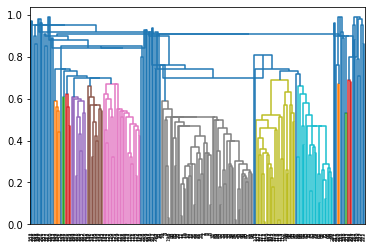

In [8]:
from scipy.cluster.hierarchy import dendrogram


dendrogram(model.linkage)